# Results from DFT Calculations
This jupyter notebook extracts the results from the DFT calculations given from VASP.

## Bulk Calculations
The figure below illustrates a unit cell of a structure on the form AB$_2$ with a space group: Pnma 62, which illustrates an orthorombic structure containing 8 A(Ba $\&$ Sr)-atoms  (large green spheres) and 16 B (Si, Ge, C)-atoms (small blue spheres) that are contained in the unit cell.

<img src="../Results/Figures/cell.png">

### Convergence
In this section we are going to check convergence of various calculated properties and we will focus on the material BaSi$_2$ for the convergence tests, and base our calculation on these values throughout this project. 


#### Total Energy
We start by looking at the convergence of the total energy as a function of the energy cutoff.This can be visualized by plotting the total energy as a function of the cutoff energy and this isillustrated in Figure 1 below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sns.set()
sys.path.append('../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile


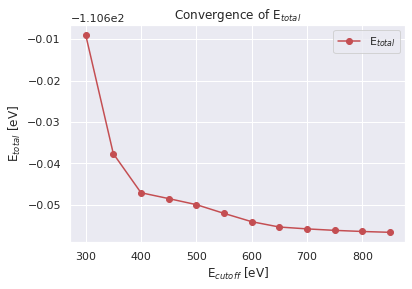

In [2]:
thisdir = 'Bulk/BaSi2/Convergence'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)


total_energy = data['ecut1.txt']
cutoff = np.linspace(300, 850, 12)

plt.plot(cutoff, total_energy, "-or")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{total}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()

#### Relative Energy

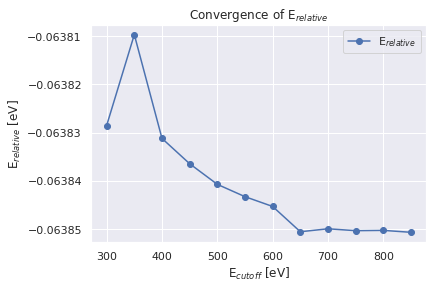

In [3]:
relative_energy = data['ecut1.txt'] - data['ecut2.txt']

plt.plot(cutoff, relative_energy, "-ob")
plt.legend(["E$_{relative}$"])
plt.title("Convergence of E$_{relative}$")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()

#### K-Density

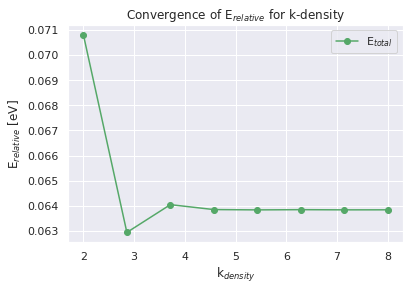

In [4]:
kpoints = np.linspace(2,8,8)
relative_kdensity = data['kdensity2.txt'] - data['kdensity1.txt']

plt.plot(kpoints, relative_kdensity, "-og")
plt.legend(["E$_{total}$"])
plt.title("Convergence of E$_{relative}$ for k-density")
plt.xlabel("k$_{density}$")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()

## Layer Calculations

### Convergence

#### Vacuum 

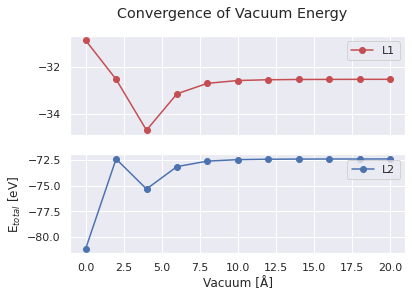

In [5]:
thisdir = 'Layers/convergence_Results/L1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)

thisdir = '../Results/Layers/convergence_Results/L2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)


vacuum_energy1 = data1['vacuum.txt']
vacuum_energy2 = data2['vacuum.txt']
vacuum = np.linspace(0, 20, 11)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of Vacuum Energy')

ax1.plot(vacuum, vacuum_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(vacuum, vacuum_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Total Energy
Both for 1 layer and 2 layers

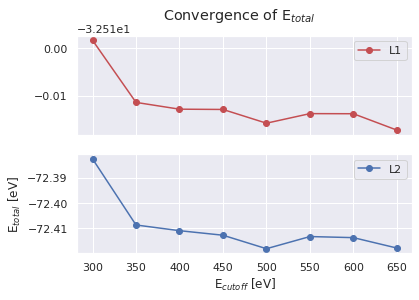

In [6]:
total_energy1 = data1['ecut1.txt']
total_energy2 = data2['ecut1.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{total}$')

ax1.plot(cutoff, total_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, total_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()


#### Relative Energy

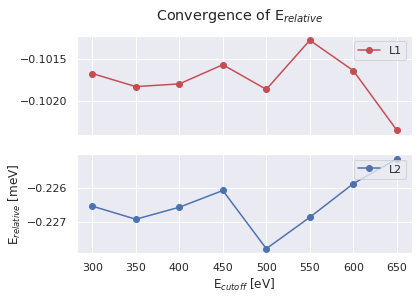

In [7]:
relative_energy1 = data1['ecut1.txt'] - data1['ecut2.txt']
relative_energy2 = data2['ecut1.txt'] - data2['ecut2.txt']
cutoff = np.linspace(300, 650, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of E$_{relative}$')

ax1.plot(cutoff, relative_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(cutoff, relative_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{relative}$ [meV]")
plt.show()


#### Kdensity

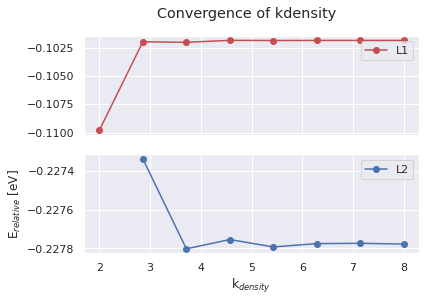

In [8]:
kdensity_energy1 = data1['kdensity1.txt'] - data1['kdensity2.txt']
kdensity_energy2 = data2['kdensity1.txt'] - data2['kdensity2.txt'][1:]
kponints = np.linspace(2, 9, 8)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence of kdensity')

ax1.plot(kpoints, kdensity_energy1, "-or", label='L1')
ax1.legend(loc="upper right")
ax2.plot(kpoints[1:], kdensity_energy2, "-ob", label='L2')
ax2.legend(loc="upper right")
plt.xlabel("k$_{density}$ ")
plt.ylabel("E$_{relative}$ [eV]")
plt.show()


#### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [9]:
thisdir = 'atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)

barium = data['barium.txt']
silicon = data['silicon.txt']
carbon = data['carbon.txt']

basi2_atoms = 8*barium[0] + 16*silicon[0]
basi2_crystal = 4*barium[1] + 2*silicon[2]
basi2_cluster = 8*barium[0] + 4*silicon[1]

#graphite_atoms = 

## Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

### Graphite

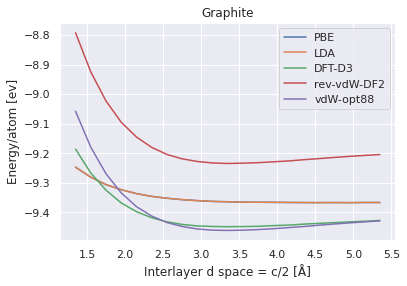

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = 'Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = 'Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = 'Layers/L_L_distance/Graphite/PBE.txt'
lda = 'Layers/L_L_distance/Graphite/LDA.txt'
vdw = 'Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)

# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, (pbe['energy']-4*carbon)/n)
plt.plot(x, (lda['energy']-4*carbon)/n)
plt.plot(x, (dft['energy']-4*carbon)/n)
plt.plot(x, (rev['energy']-4*carbon)/n)
plt.plot(x, (vdw['energy']-4*carbon)/n)
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.show()

### BaSi2

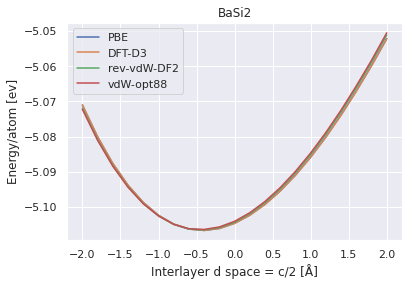

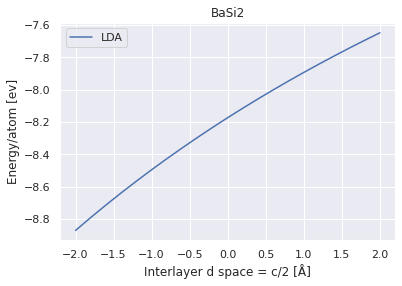

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = 'Layers/L_L_distance/BaSi2/DFT-D3.txt'
rev = 'Layers/L_L_distance/BaSi2/rev-vdW-DF2.txt'
pbe = 'Layers/L_L_distance/BaSi2/PBE.txt'
lda = 'Layers/L_L_distance/BaSi2/LDA.txt'
vdw = 'Layers/L_L_distance/BaSi2/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, (pbe['energy']-basi2_atoms)/n)
plt.plot(x, (dft['energy']-basi2_atoms)/n)
plt.plot(x, (rev['energy']-basi2_atoms)/n)
plt.plot(x, (vdw['energy']-basi2_atoms)/n)
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.show()

plt.plot(x, (lda['energy']-basi2_atoms)/n)
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])
plt.show()

# Energy

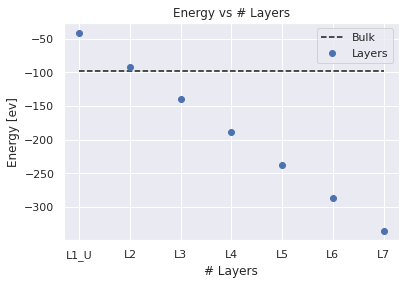

In [12]:
thisdir = 'Layers/energies/etot.txt'
folders = ['L1_U', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
data = pd.read_table(thisdir, delim_whitespace=True)

energies = data['energy']



bulk = np.ones(len(energies[1:]))*energies[0]

plt.plot(folders, bulk, '--k')
plt.plot(folders, energies[1:], 'ob')
plt.title("Energy vs # Layers")
plt.ylabel("Energy [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])
plt.show()

# Density of States

## Total DOS

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"


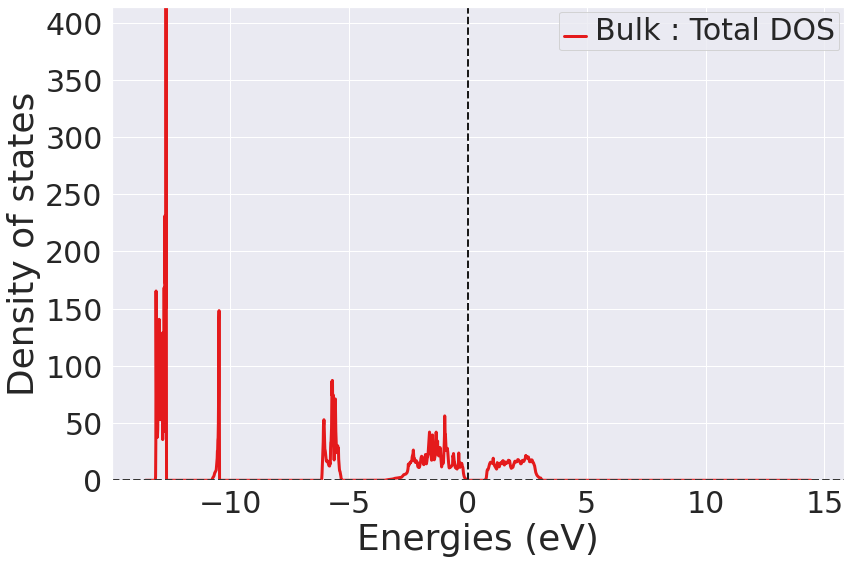

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L2
  warnings.warn("No POTCAR file with matching TITEL fields"


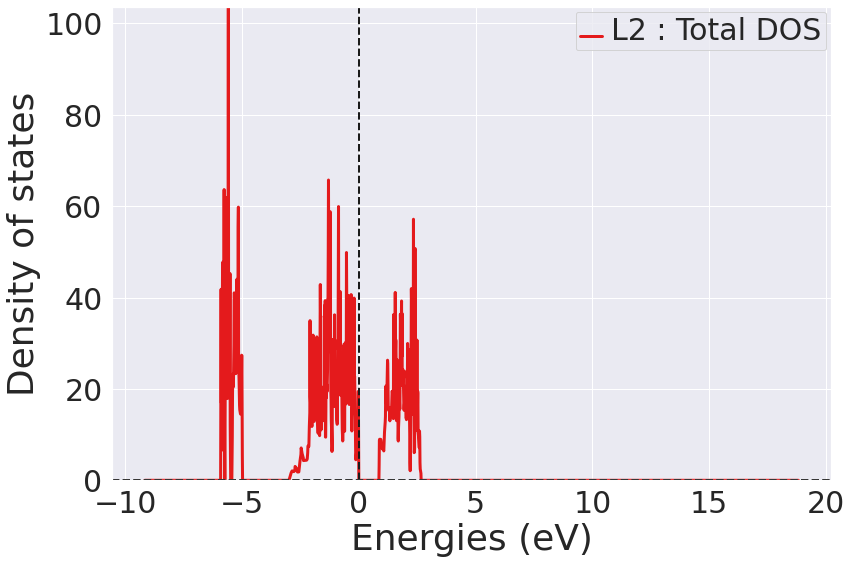

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L3
  warnings.warn("No POTCAR file with matching TITEL fields"


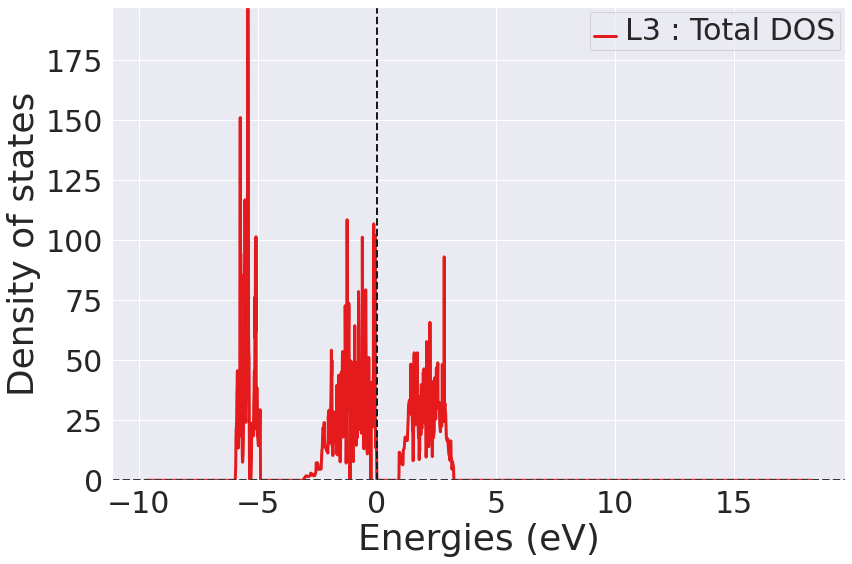

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L4
  warnings.warn("No POTCAR file with matching TITEL fields"


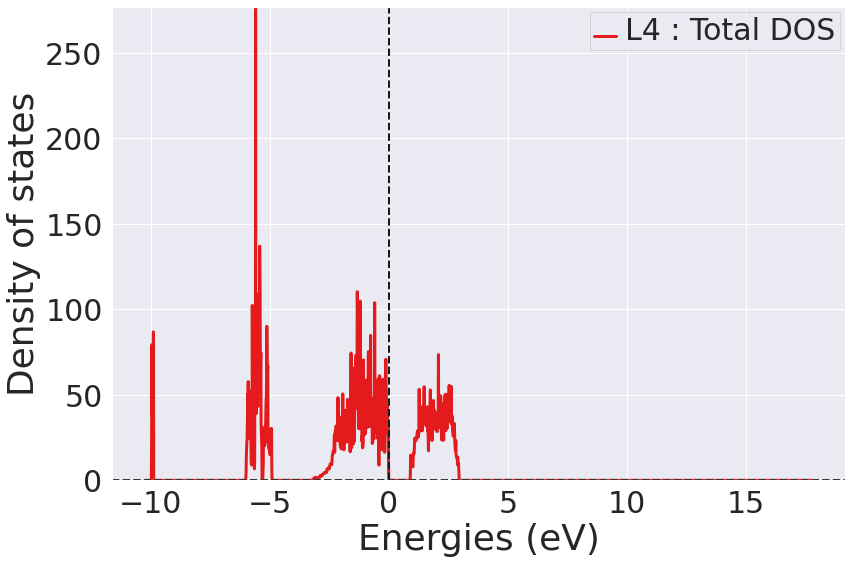

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L5
  warnings.warn("No POTCAR file with matching TITEL fields"


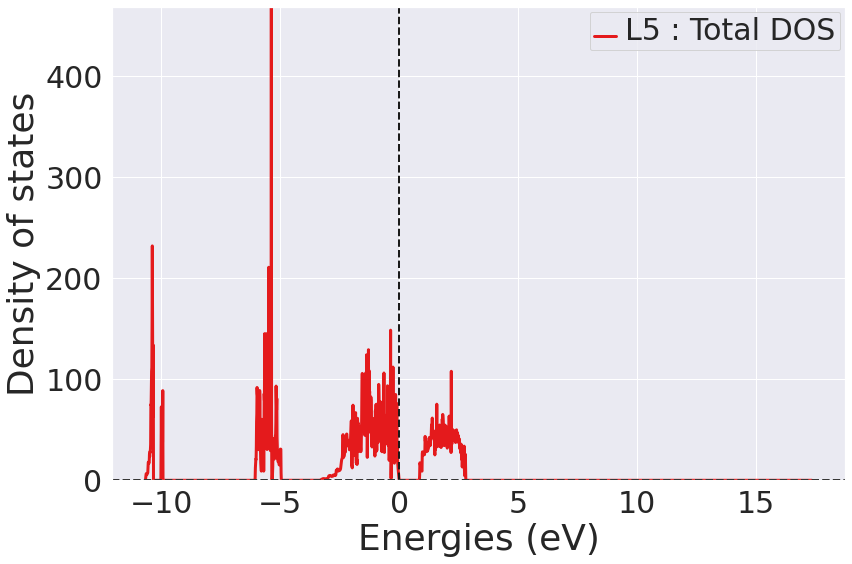

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L6
  warnings.warn("No POTCAR file with matching TITEL fields"


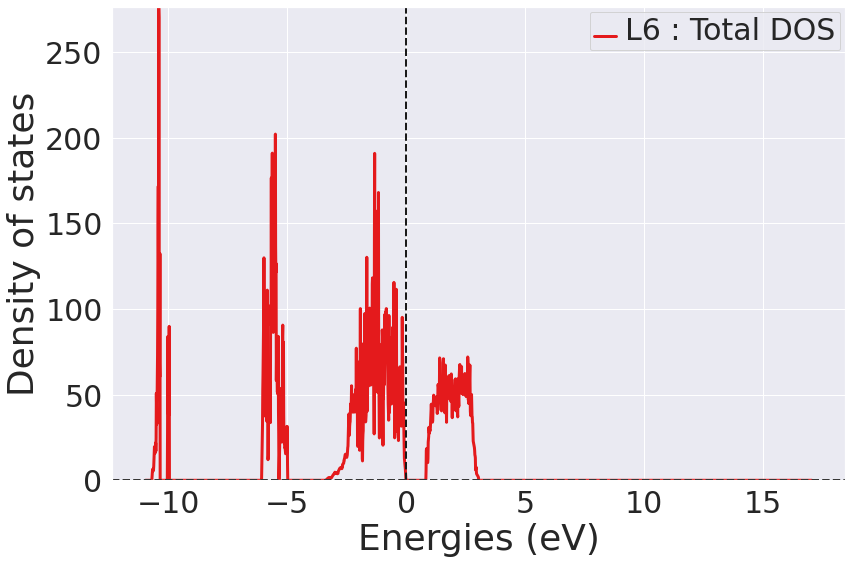

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/L7
  warnings.warn("No POTCAR file with matching TITEL fields"


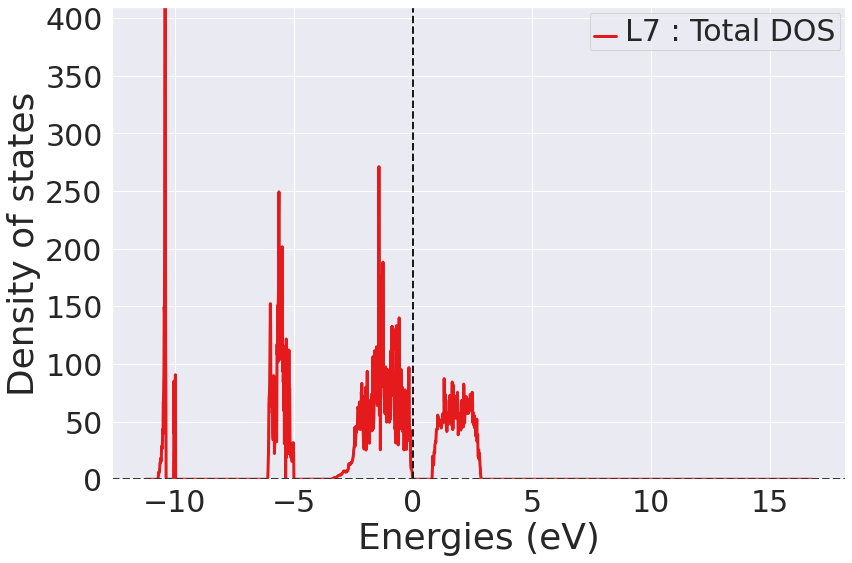

In [13]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']

for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    tdos = v.tdos
    plotter = DosPlotter()
    plotter.add_dos(folder + " : Total DOS", tdos)
    plotter.show()

## Elemental DOS

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/dos/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"


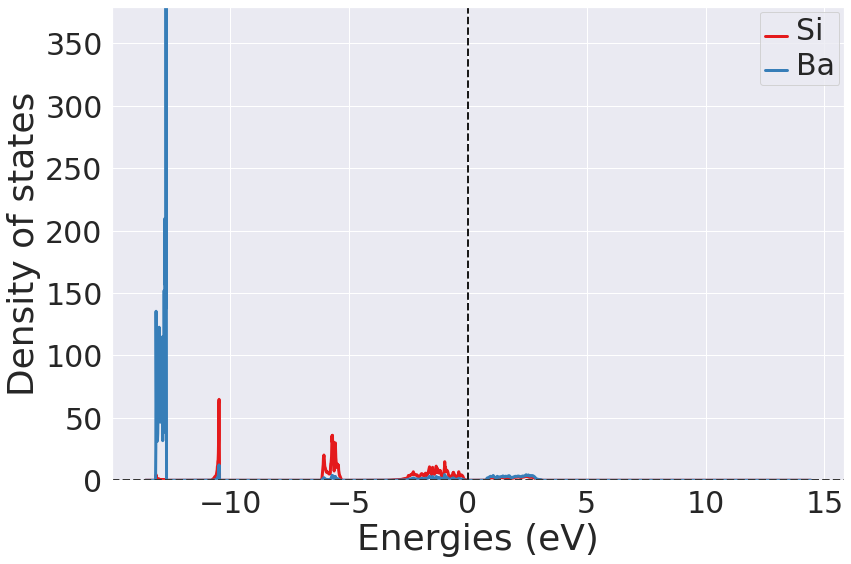

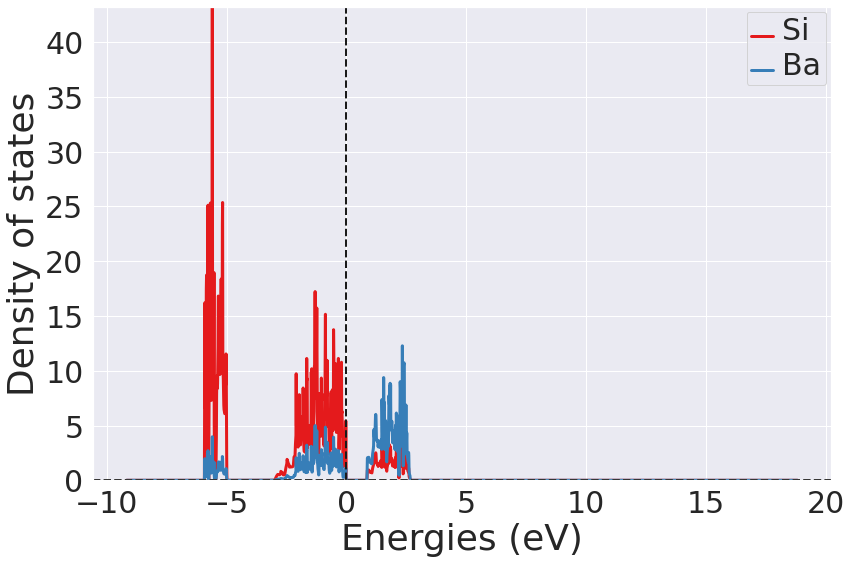

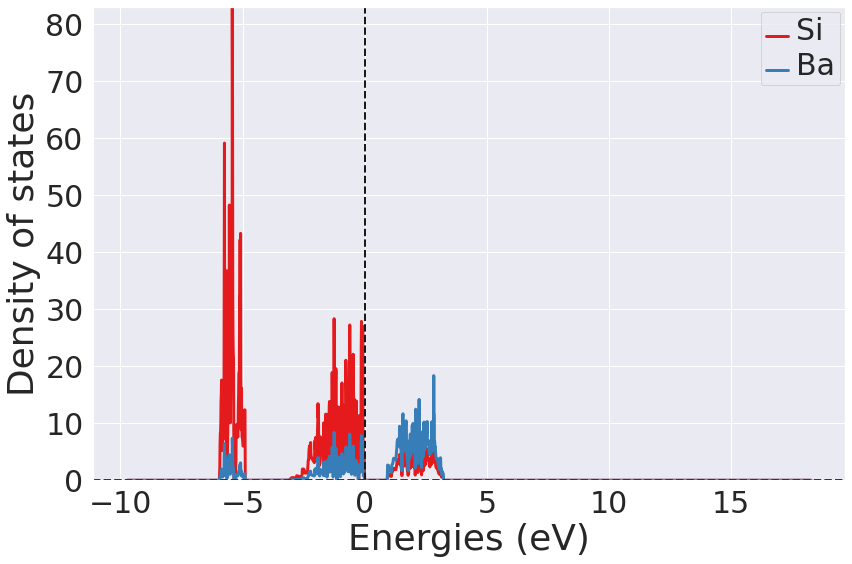

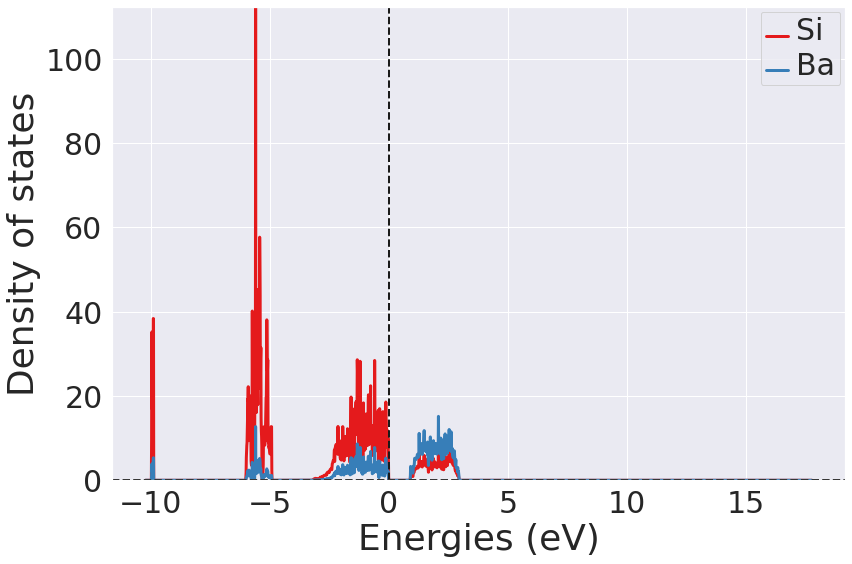

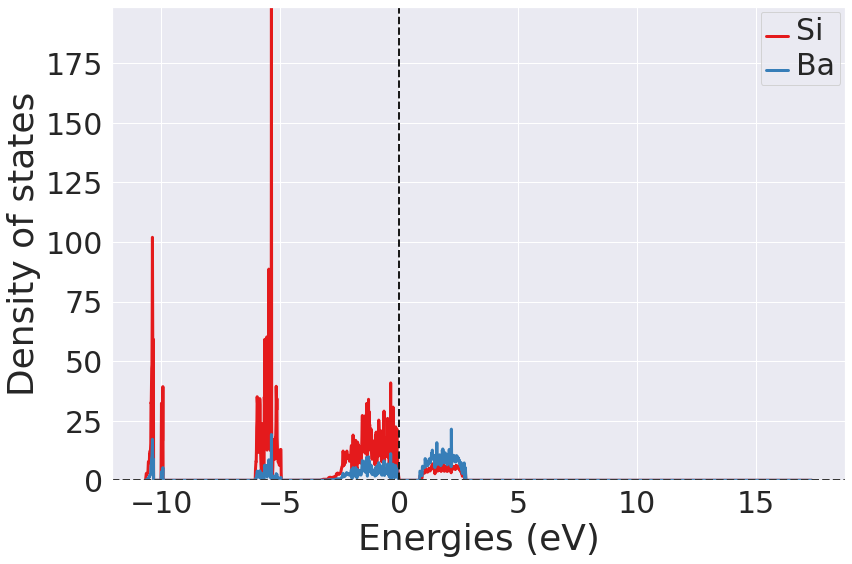

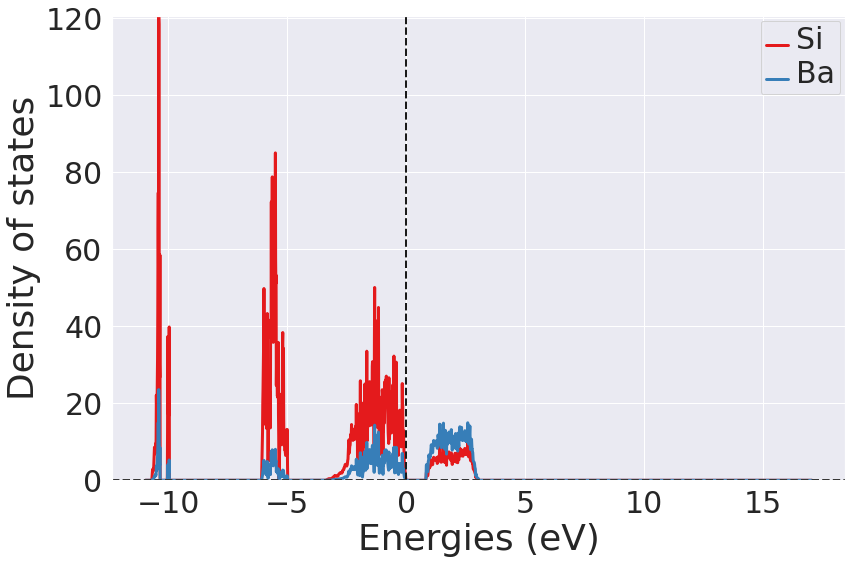

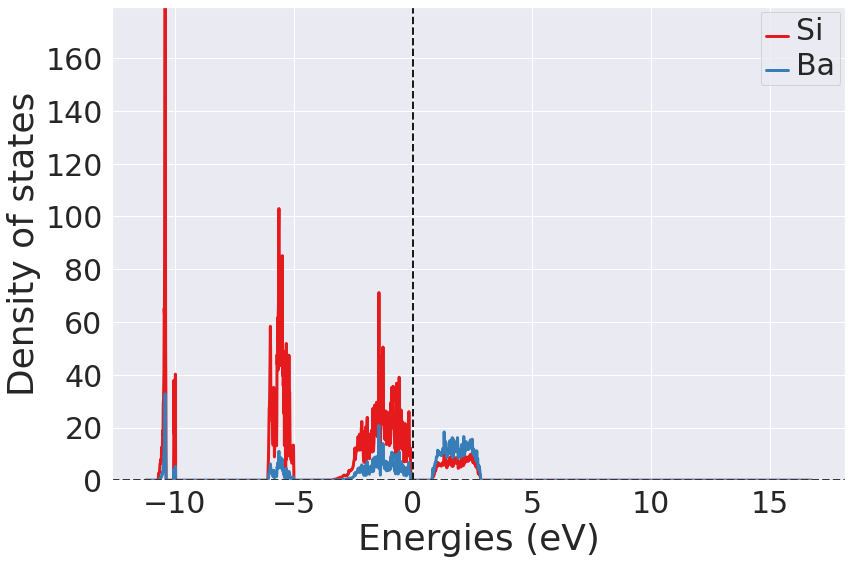

In [14]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'


    v = Vasprun(thisdir+'vasprun.xml')
    cdos = v.complete_dos
    element_dos = cdos.get_element_dos()
    plotter = DosPlotter()
    plotter.add_dos_dict(element_dos)
    plotter.show()

### Si spd DOS 

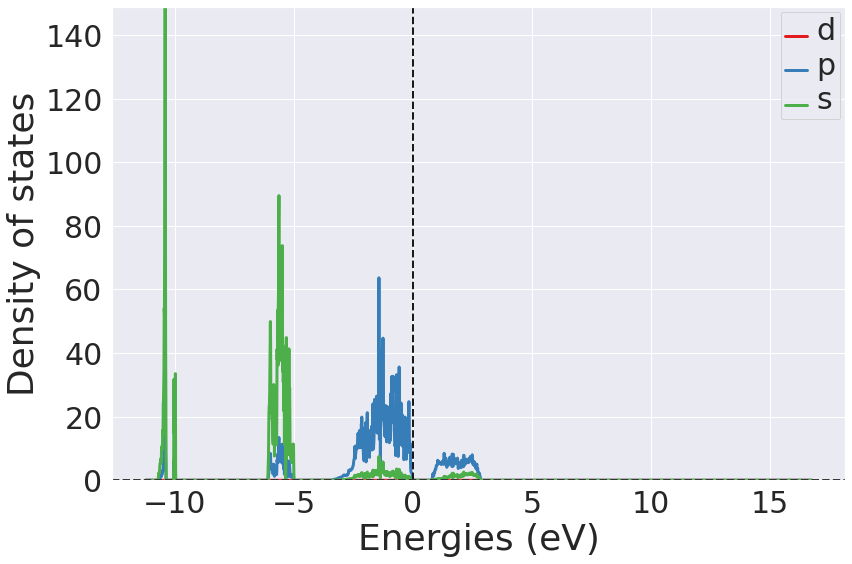

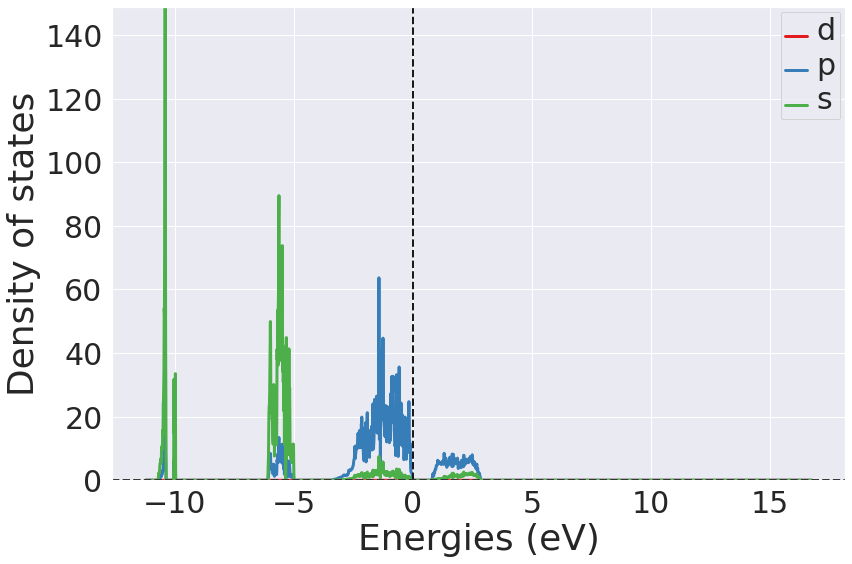

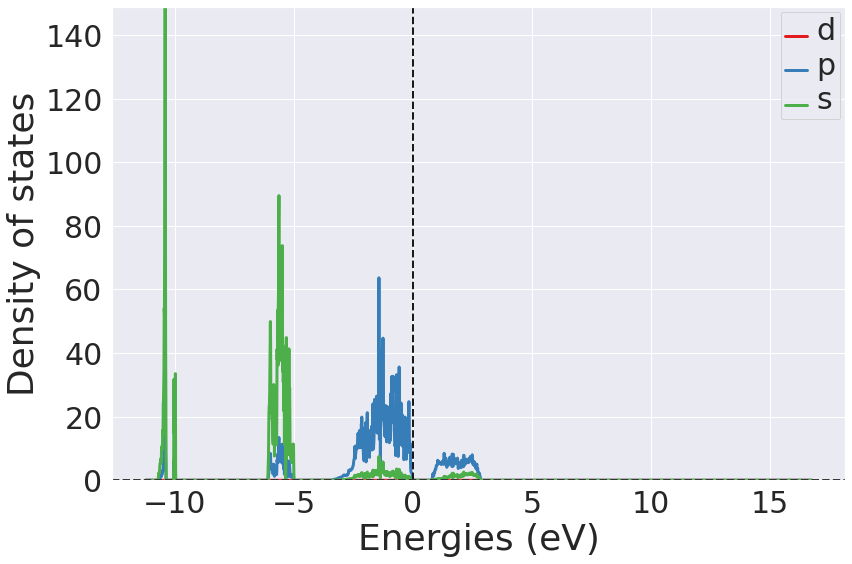

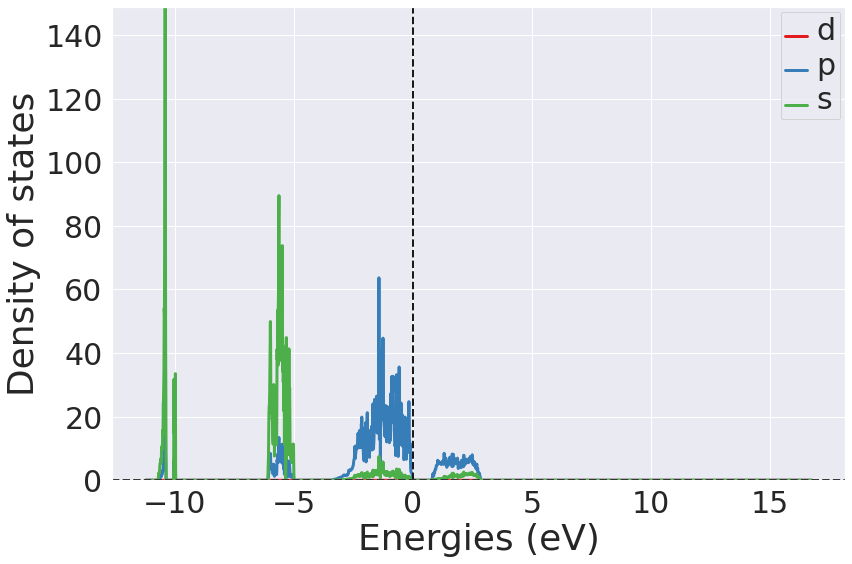

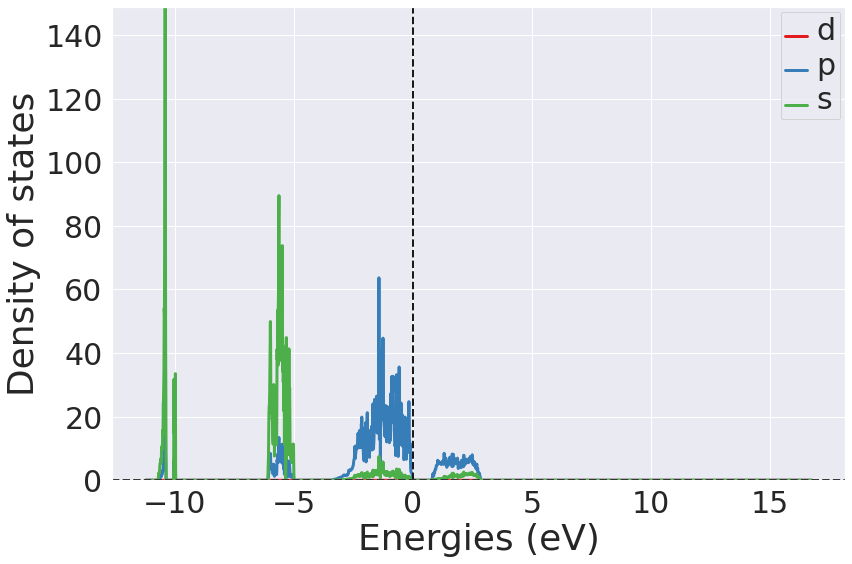

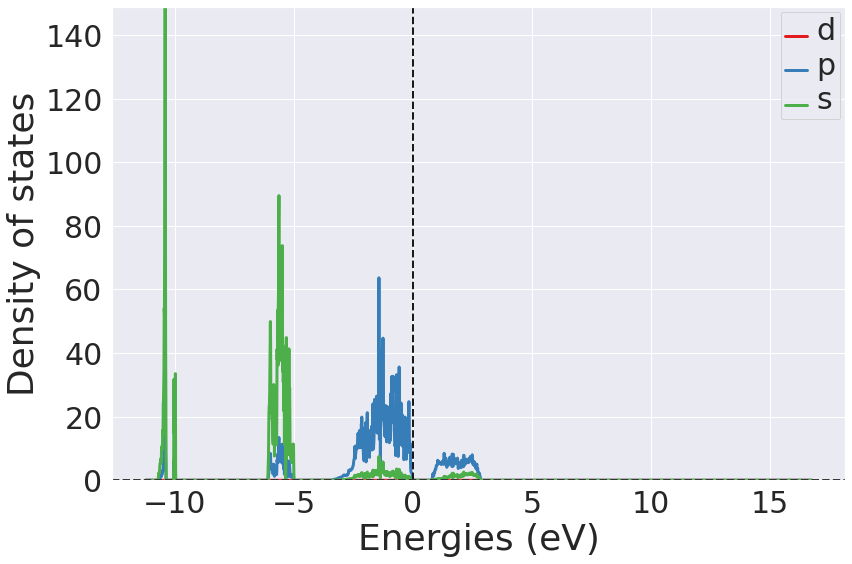

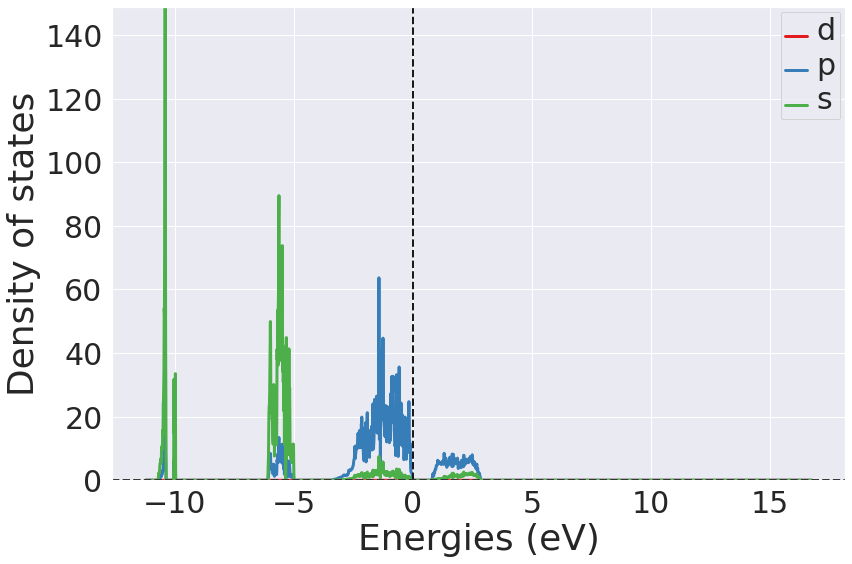

In [15]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Si')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

### Ba spd DOS

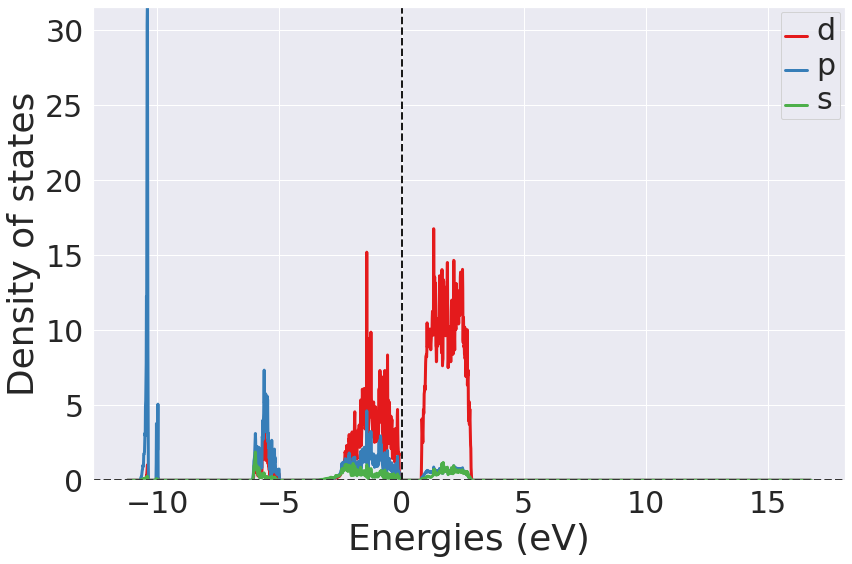

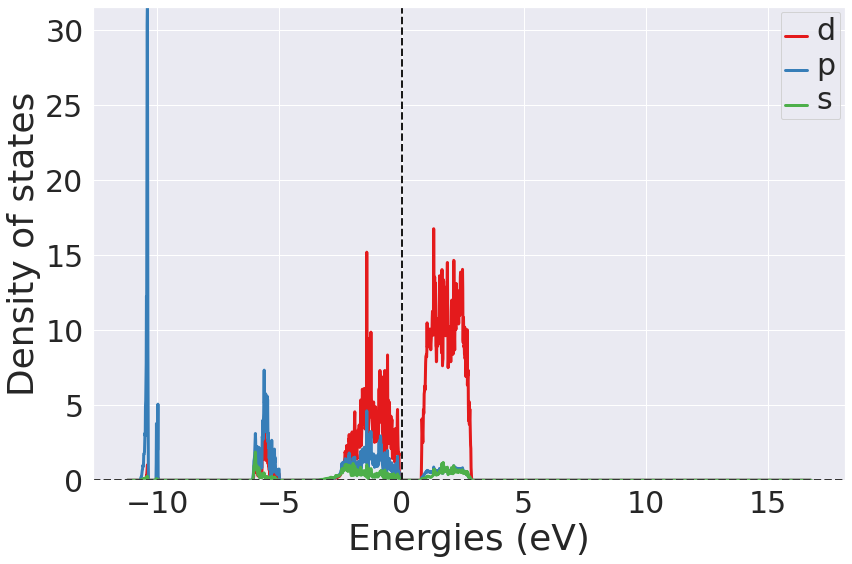

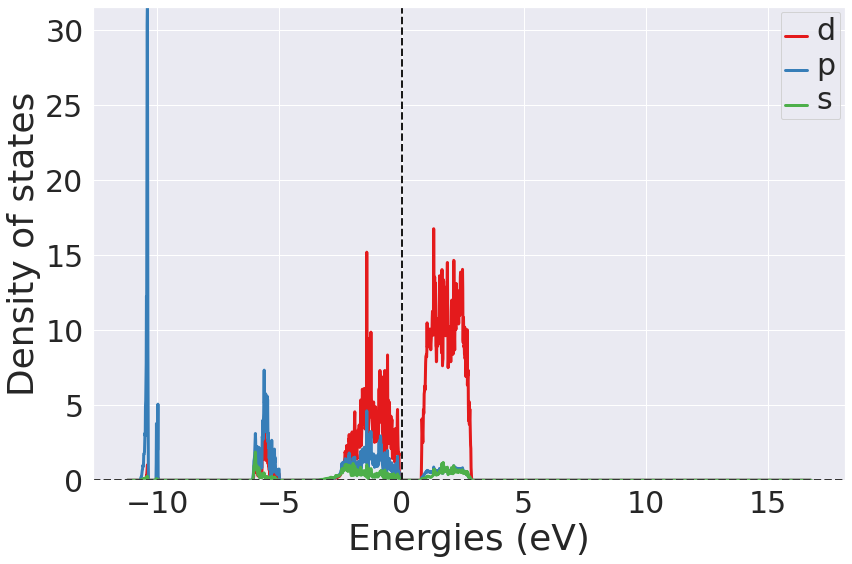

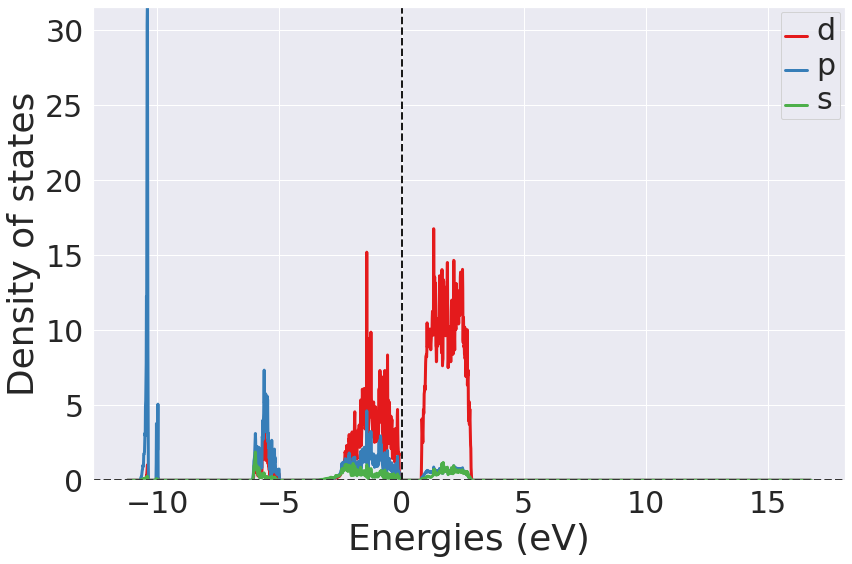

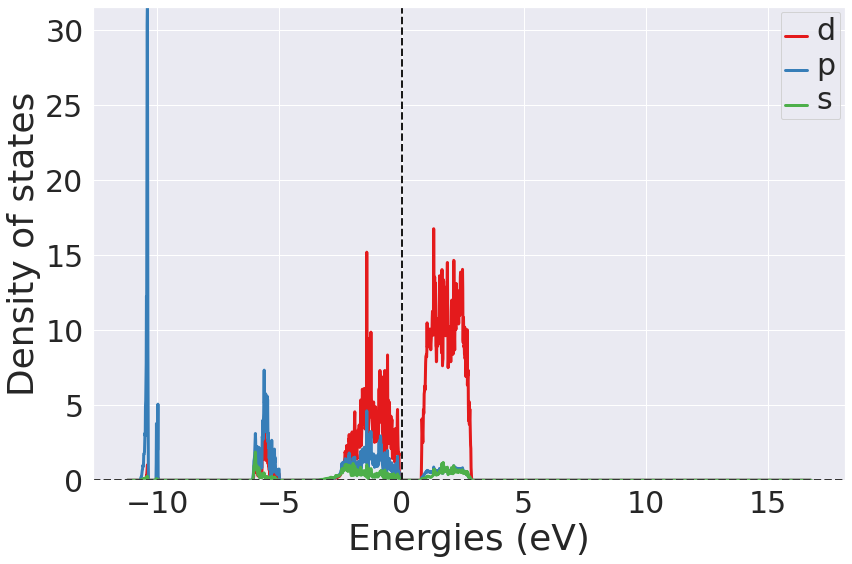

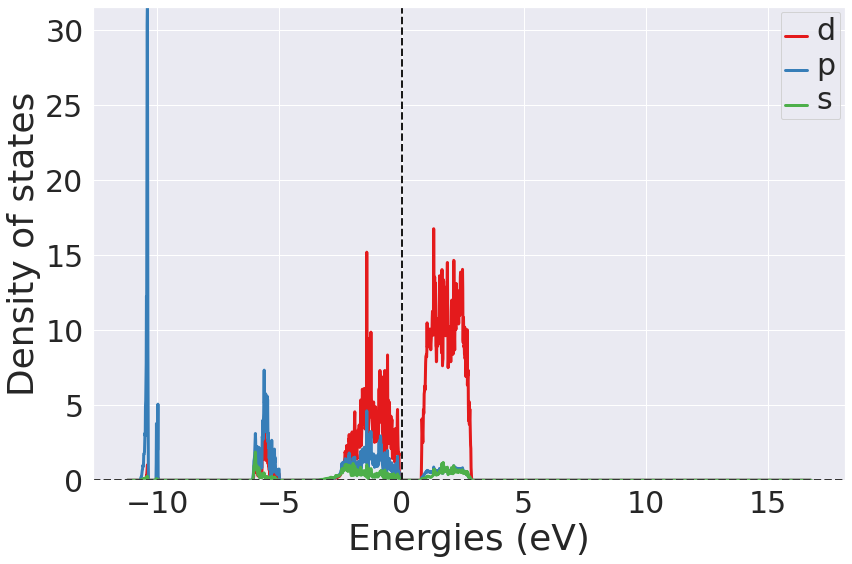

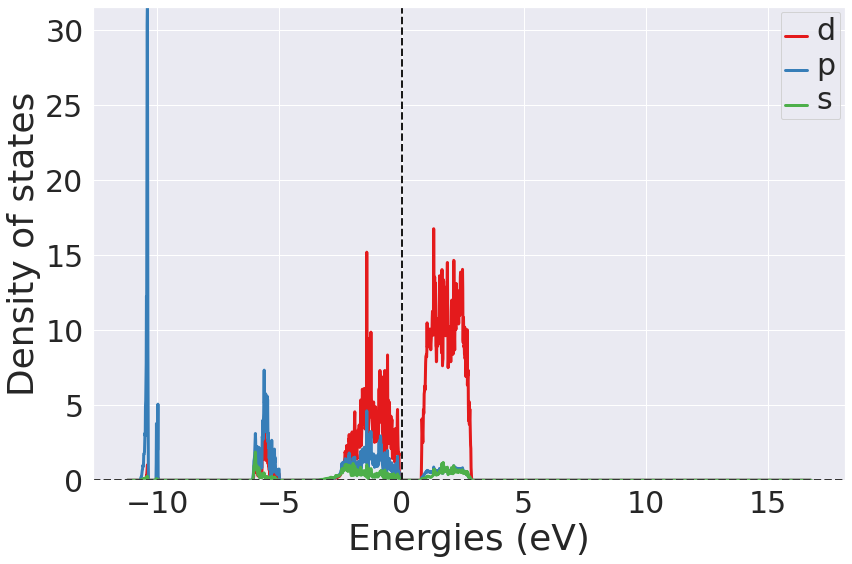

In [16]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:
    
    
    thisdir = 'Layers/dos/' + folder + '/'
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Ba')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

# Band Structure

## PBE + vdW

/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/Bulk
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/L2
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with matching TITEL fields was found in /home/msismail/UiO/Master/DFT/DFT-Git/Results/Layers/band_structure/rev-vdW-DF2/L3
  warnings.warn("No POTCAR file with matching TITEL fields"
/home/msismail/.local/lib/python3.8/site-packages/pymatgen/io/vasp/outputs.py:888: UserWarning: No POTCAR file with 

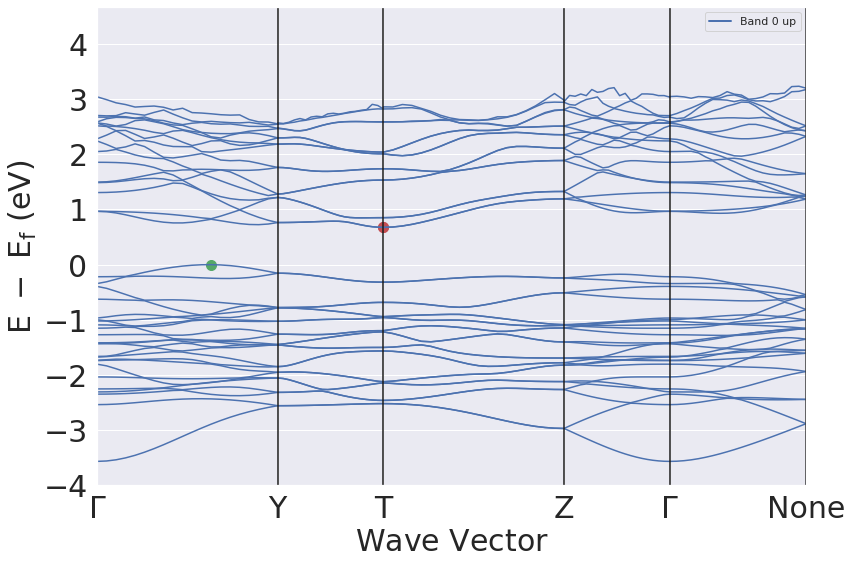

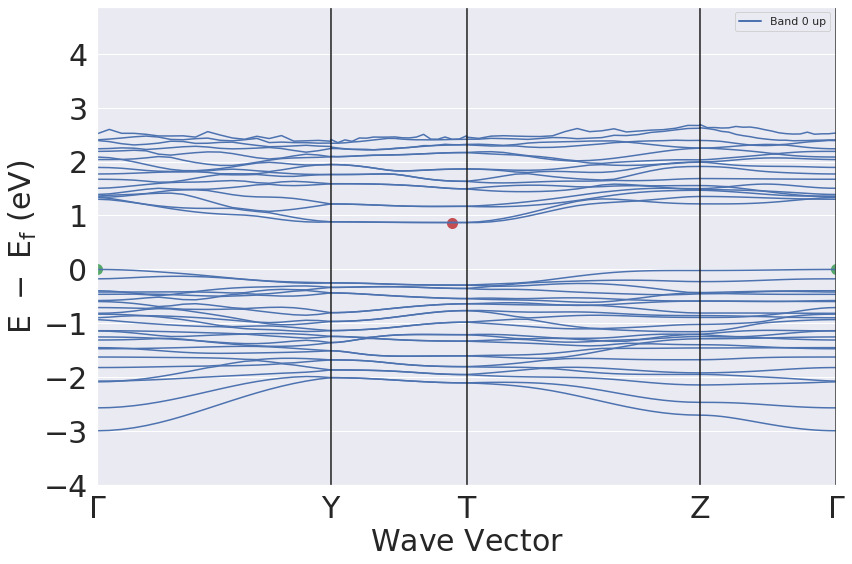

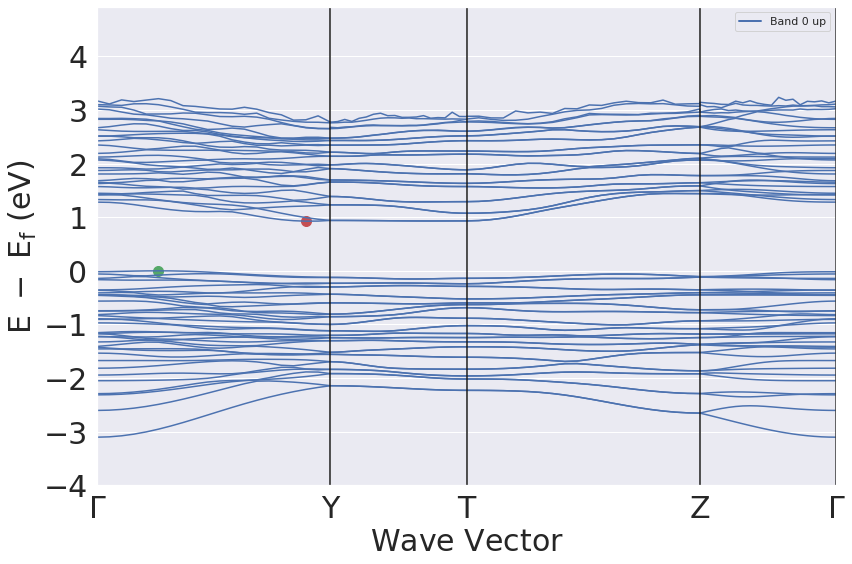

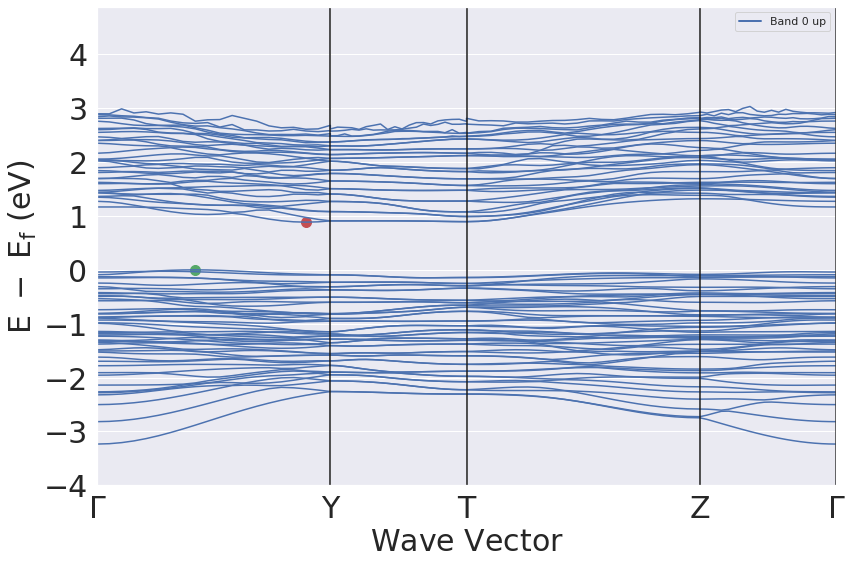

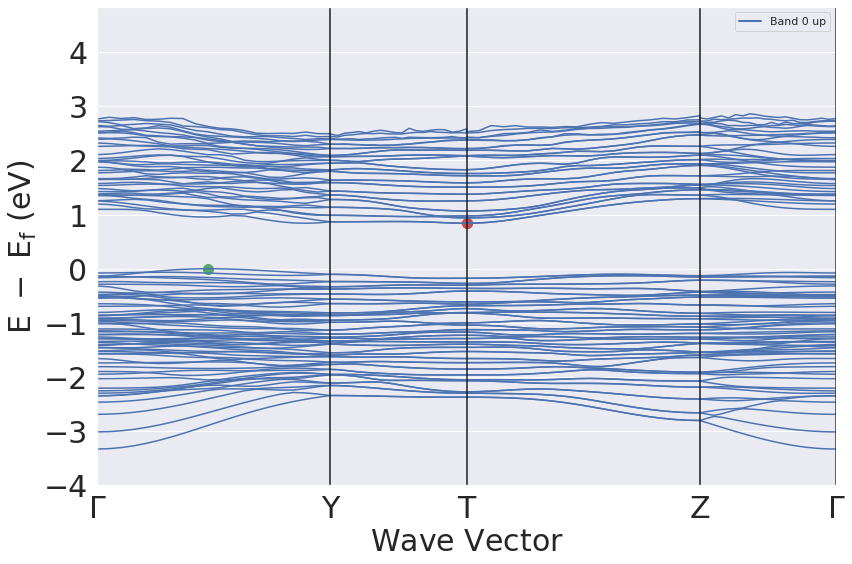

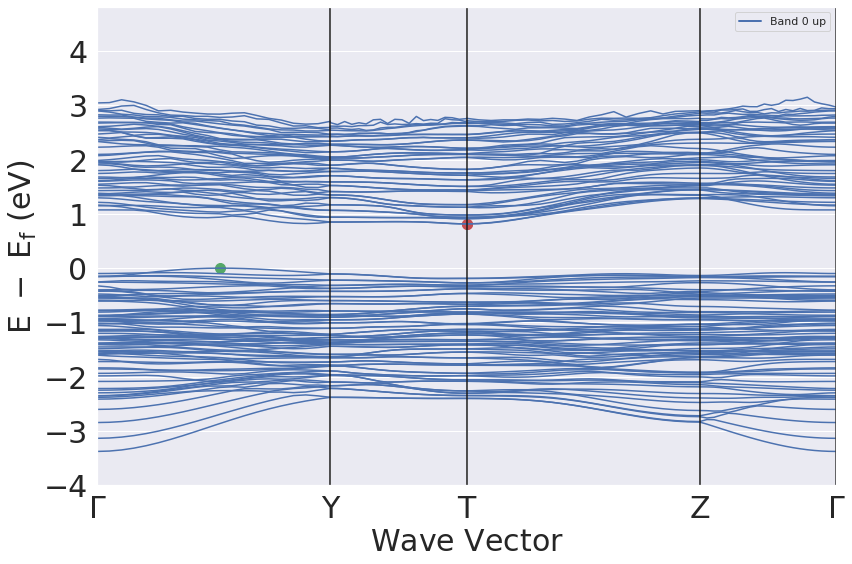

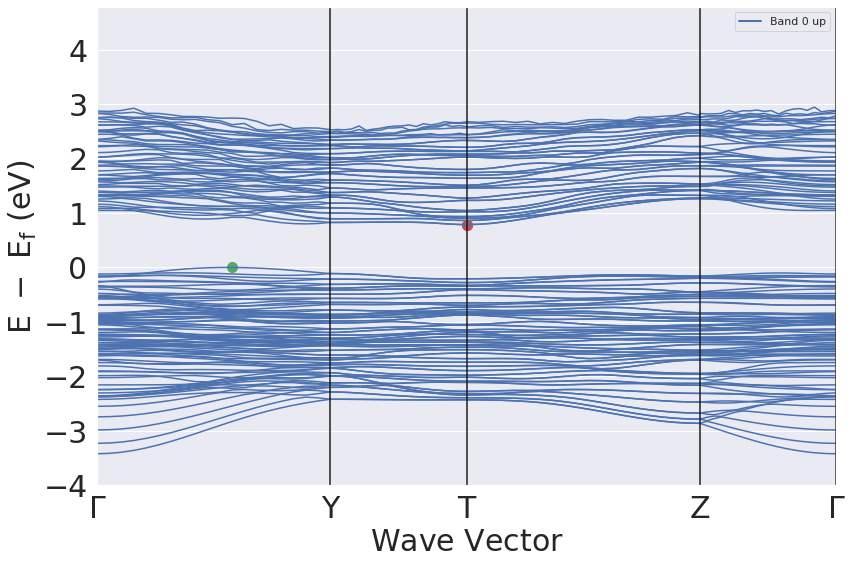

In [17]:
folders = ['Bulk', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
for folder in folders:

    thisdir = 'Layers/band_structure/rev-vdW-DF2/' + folder + '/'

    v = Vasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties

    v = BSVasprun(thisdir + 'vasprun.xml')
    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True)

## HSE

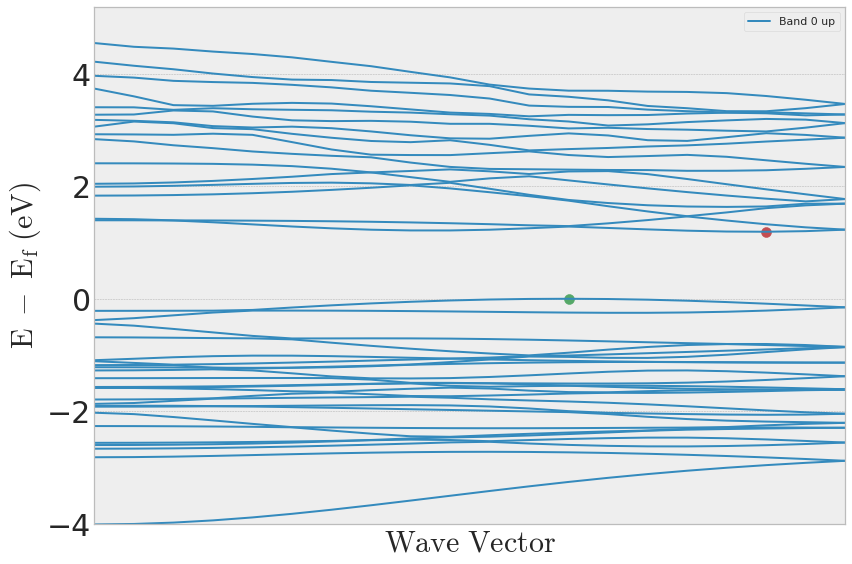

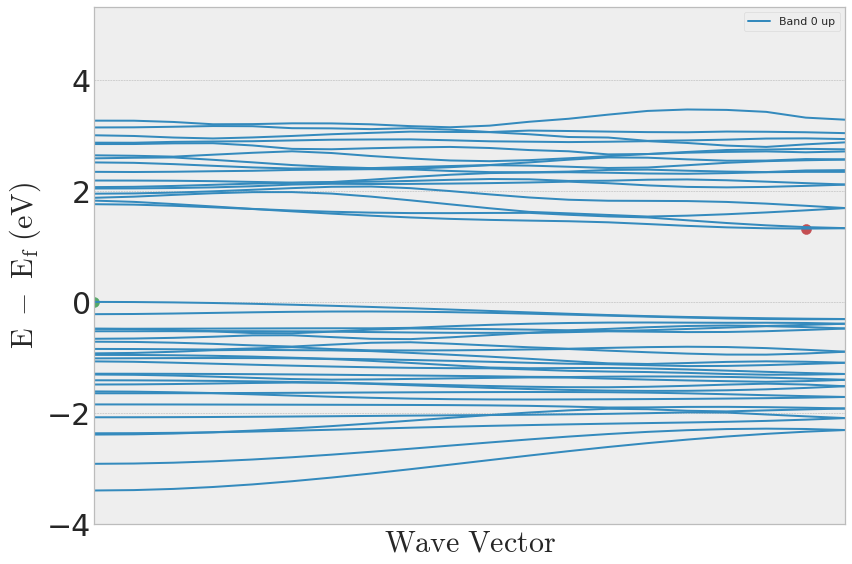

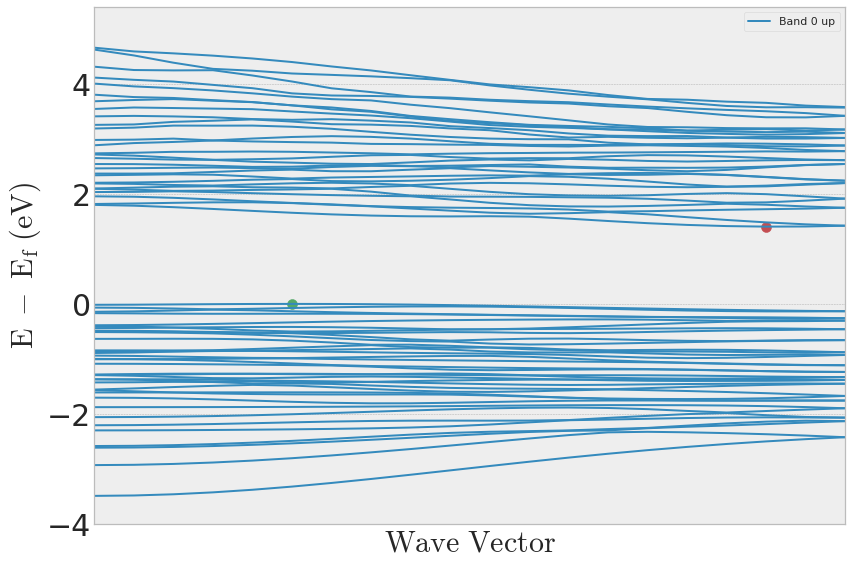

In [23]:
import matplotlib.pyplot as plt
from vasprun import vasprun
folders = ['Bulk', 'L2', 'L3']

for folder in folders:

    thisdir = 'Layers/band_structure/HSE/' + folder + '/'

    v = BSVasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties

    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True, force_hybrid_mode=True)
    plt = BSPlotter(bs)
    plt.get_plot(vbm_cbm_marker=True)
    
    
    

# Bandgap

## PBE + vdW

<ipython-input-24-042a1ebe1915>:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


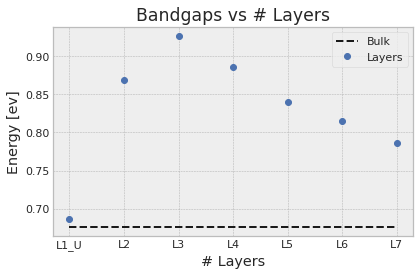

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

thisdir = 'Layers/bandgap/rev-vdW-DF2/bandgap.txt'
folders = ['L1_U', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
data = pd.read_table(thisdir, delim_whitespace=True)

bandgaps = data['Gap']

bulk = np.ones(len(bandgaps[3:]))*bandgaps[0]

plt.plot(folders, bulk, '--k')
plt.plot(folders, bandgaps[3:], 'ob')
plt.title("Bandgaps vs # Layers")
plt.ylabel("Energy [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])
plt.show()


## HSE

<ipython-input-20-3e494968d966>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


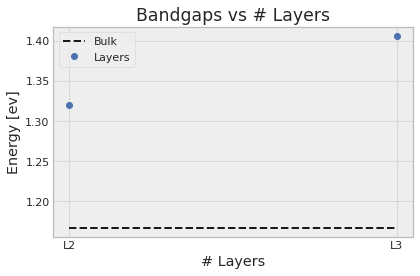

In [20]:
thisdir = 'Layers/bandgap/HSE/bandgap.txt'
folders = ['L2', 'L3']
data = pd.read_table(thisdir, delim_whitespace=True)

bandgaps = data['Gap']

bulk = np.ones(len(bandgaps[2:]))*bandgaps[0]

plt.plot(folders, bulk, '--k')
plt.plot(folders, bandgaps[2:], 'ob')
plt.title("Bandgaps vs # Layers")
plt.ylabel("Energy [ev]")
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])
plt.show()